In [ ]:
import pandas as pd
import numpy as np
import tsplib95
import random

In [ ]:
sys.version

In [ ]:
random.seed(a=1, version=2)
problem = tsplib95.load('Data/ts225.tsp')
graph = problem.get_graph()

## Objective function

# $Min \; Z= \; \displaystyle\sum_{i=1}^n\sum_{j=1,j\neq i}^n d_{ij}  x_{ij} $
## $Subject \;to:$
## $\displaystyle\sum_{j=1, j\neq i}^n x_{ij} = 1, \; \forall \;i \in N$
## $\displaystyle\sum_{i=1, i\neq j}^n x_{ij} = 1, \; \forall \;j \in N$
## $\displaystyle\sum_{i\in Q} \sum_{j\neq i, j\in Q} x_{ij} \le |Q| - 1 \; \forall \; Q \subset \{1,...,n\},\; |Q| \ge2  $

In [ ]:
problem.get_weight(168,2)

In [510]:
def Greedy(percent):
    cities = len(problem.node_coords)
    city_list = [i for i in range(1,cities+1)]
    cost_matrix = pd.DataFrame([])
    for i in range(1,len(city_list)+1):
        cost_matrix[i] = 0
    cost_matrix = cost_matrix.transpose()
    for i in range(1,len(city_list)+1):
        cost_matrix[i] = 0

    for i in range(1,len(city_list)+1):
        for j in range(1,len(city_list)+1):
            if i == j:
                cost_matrix[i][j] = 999999999
            else:
                cost_matrix[i][j] = problem.get_weight(i,j)
    tour = []
    tour.append(city_list[0])
    city_list.pop(0)
    while city_list != []:
        city = tour[-1]
        cost_matrix = cost_matrix.drop(tour[-1], axis = 1)
        viable_options = []
        cost_matrix = cost_matrix.sort_values(by=city,axis=1)
        #viable_options = cost_matrix.loc[city][0:max(2,round(len(city_list)*percent))].index
        #viable_options = cost_matrix.loc[city][0:random.randint(1,3)].index
        next_city_index = random.randint(0, len(viable_options)-1)
        tour.append(viable_options[next_city_index])
        city_list.remove(tour[-1])
    tour.append(tour[0])
    distance_traveled = 0
    for i in range(0,len(tour)):
        distance_traveled += problem.get_weight(tour[i-1],tour[i])
    print('Done with '+ str(percent))
    return distance_traveled

In [521]:
# Completely Greedy
cities = len(problem.node_coords)
city_list = [i for i in range(1,cities+1)]
cost_matrix = pd.DataFrame([])
for i in range(1,len(city_list)+1):
    cost_matrix[i] = 0
cost_matrix = cost_matrix.transpose()
for i in range(1,len(city_list)+1):
    cost_matrix[i] = 0

for i in range(1,len(city_list)+1):
    for j in range(1,len(city_list)+1):
        if i == j:
            cost_matrix[i][j] = 999999999
        else:
            cost_matrix[i][j] = problem.get_weight(i,j)
tour = []
tour.append(city_list[0])
city_list.pop(0)
while city_list != []:
    city = tour[-1]
    cost_matrix = cost_matrix.drop(tour[-1], axis = 1)
    viable_options = []
    cost_matrix = cost_matrix.sort_values(by=city,axis=1)
    viable_options = cost_matrix.loc[city][0:1].index
    next_city_index = random.randint(0, len(viable_options)-1)
    tour.append(viable_options[next_city_index])
    city_list.remove(tour[-1])
tour.append(tour[0])
distance_traveled = 0
for i in range(0,len(tour)):
    distance_traveled += problem.get_weight(tour[i-1],tour[i])
print(distance_traveled)


154538


In [511]:
results = pd.DataFrame([])
tours = []
percentages = np.linspace(0,0.05,10)
for i in percentages:
    tours.append(Greedy(i))


Done with 0.0
Done with 0.005555555555555556
Done with 0.011111111111111112
Done with 0.016666666666666666
Done with 0.022222222222222223
Done with 0.02777777777777778
Done with 0.03333333333333333
Done with 0.03888888888888889
Done with 0.044444444444444446
Done with 0.05


In [512]:
results['Percent'] = percentages
results['Tours'] = tours

<AxesSubplot:>

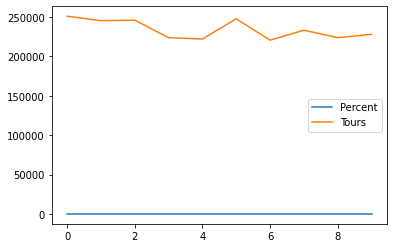

In [513]:
results.plot()

<AxesSubplot:>

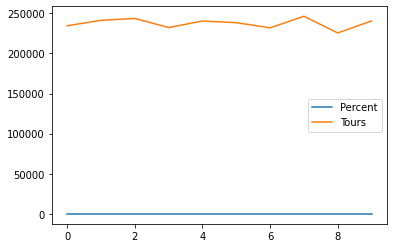

In [486]:
results.plot()

<AxesSubplot:>

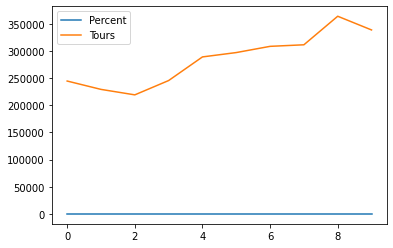

In [480]:
results.plot()

# Local Search